In [2]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
# Update this to match your path
train_data_dir = "/content/drive/MyDrive/Images"

IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
NUM_CLASSES = 2
EPOCHS = 15


In [15]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 439 images belonging to 2 classes.
Found 108 images belonging to 2 classes.


In [6]:
# STEP 1: Define Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Fit the generator
datagen.fit(X_train)

In [16]:
base_model = MobileNetV2(input_shape=(128, 128, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False  # Freeze base

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 838ms/step - accuracy: 0.4472 - loss: 1.6215

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.4484 - loss: 1.6054 - val_accuracy: 0.7222 - val_loss: 0.5970
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 864ms/step - accuracy: 0.5610 - loss: 0.8146 - val_accuracy: 0.6759 - val_loss: 0.5625
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 836ms/step - accuracy: 0.5805 - loss: 0.8834 - val_accuracy: 0.7778 - val_loss: 0.4544
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 797ms/step - accuracy: 0.6146 - loss: 0.7886 - val_accuracy: 0.8148 - val_loss: 0.4126
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 674ms/step - accuracy: 0.6642 - loss: 0.6956 - val_accuracy: 0.8056 - val_loss: 0.4047
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 833ms/step - accuracy: 0.6837 - loss: 0.6282 - val_accuracy: 0.8148 - val_loss: 0.3918
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 840ms/step - accuracy: 0.6839 - loss: 0.6775 - val_accuracy: 0.8241 - val_loss: 0.3884
Epoch 8/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 811ms/step - accuracy: 0.6387 - loss: 0.6892 - val_accuracy: 0.7963 - 

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 444ms/step - accuracy: 0.7999 - loss: 0.4012
Validation Accuracy: 81.48%


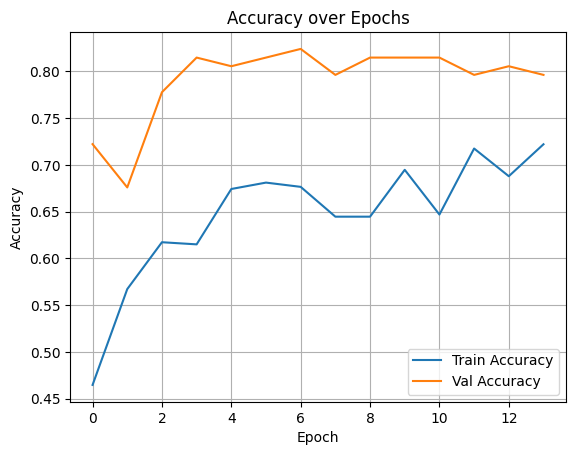

In [18]:
loss, acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()